Shape Of The Before Ouliers:  (10000,)
Shape Of The After Ouliers:  (9942,)


/Users/kaori/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kaori/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/kaori/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


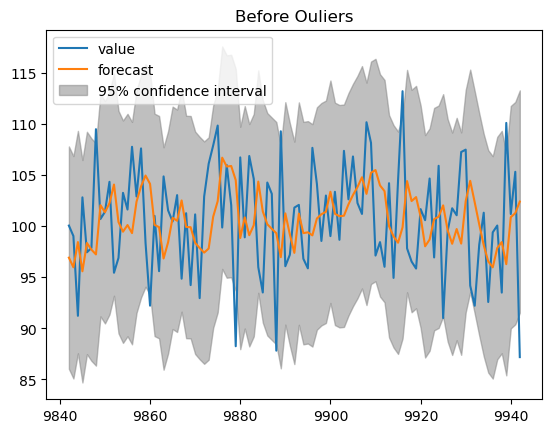

/Users/kaori/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


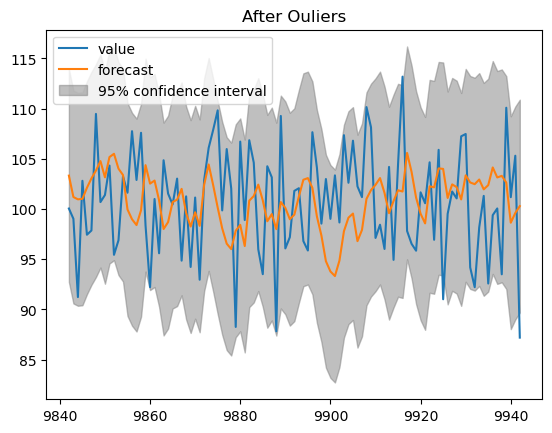

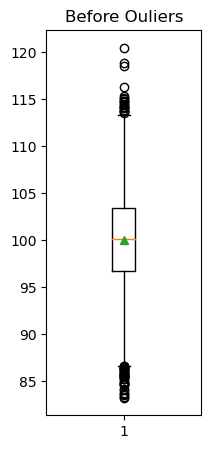

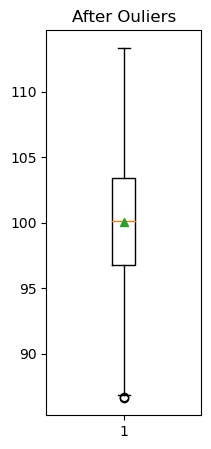

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import random
import seaborn as sns

#-----------------------------------------------------考試填空部分------------------------------------------------------
# 生成 10000 筆隨機資料
nums = []

for i in range(10000):
    
    x = random.gauss(mu=100, sigma=5)
    
    nums.append(x)
    
df = pd.DataFrame(nums, columns =['value'])

#離群值處理
n=1.5

IQR = np.percentile(df['value'],75) - np.percentile(df['value'],25)

transform_data=df[df['value'] < np.percentile(df['value'],75)+n*IQR]

transform_data=transform_data[transform_data['value'] > np.percentile(df['value'],25)-n*IQR]['value']

transform_dataDF=pd.DataFrame(transform_data)

print ("Shape Of The Before Ouliers: ",df['value'].shape)
print ("Shape Of The After Ouliers: ",transform_data.shape)



#-----------------------------------------------------考試填空部分------------------------------------------------------

# 以下部分已完成無需更動
# 3,2,1 ARIMA Model
model1 = sm.tsa.ARIMA(df.value, order=(3,2,1))
model_fit1 = model1.fit()

model2 = sm.tsa.ARIMA(transform_dataDF.value, order=(3,2,1))
model_fit2 = model2.fit()

fig, ax = plt.subplots()
ax = df.loc[(transform_dataDF.shape[0]-100):transform_dataDF.shape[0]].plot(ax=ax)
plot_predict(model_fit1, transform_dataDF.shape[0]-100, transform_dataDF.shape[0], ax=ax)
plt.title('Before Ouliers')
plt.show()

fig2, ax2 = plt.subplots()
ax2 = transform_dataDF.loc[(transform_dataDF.shape[0]-100):transform_dataDF.shape[0]].plot(ax=ax2)
plot_predict(model_fit2, transform_dataDF.shape[0]-100, transform_dataDF.shape[0], ax=ax2)
plt.title('After Ouliers')
plt.show()

plt.figure(figsize=(2,5))
plt.boxplot(df['value'],showmeans=True)
plt.title('Before Ouliers')
plt.show()

plt.figure(figsize=(2,5))
plt.boxplot(transform_dataDF['value'],showmeans=True)
plt.title('After Ouliers')
plt.show()